In [6]:
import numpy as np 
import pandas as pd
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn.cluster import AgglomerativeClustering 
%matplotlib inline

In [7]:
dataset = pd.read_csv("travel insurance.csv", nrows = 10000)
dataset.head() 

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                10000 non-null  object 
 1   Agency Type           10000 non-null  object 
 2   Distribution Channel  10000 non-null  object 
 3   Product Name          10000 non-null  object 
 4   Claim                 10000 non-null  object 
 5   Duration              10000 non-null  int64  
 6   Destination           10000 non-null  object 
 7   Net Sales             10000 non-null  float64
 8   Commision (in value)  10000 non-null  float64
 9   Gender                2084 non-null   object 
 10  Age                   10000 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 859.5+ KB


<AxesSubplot:>

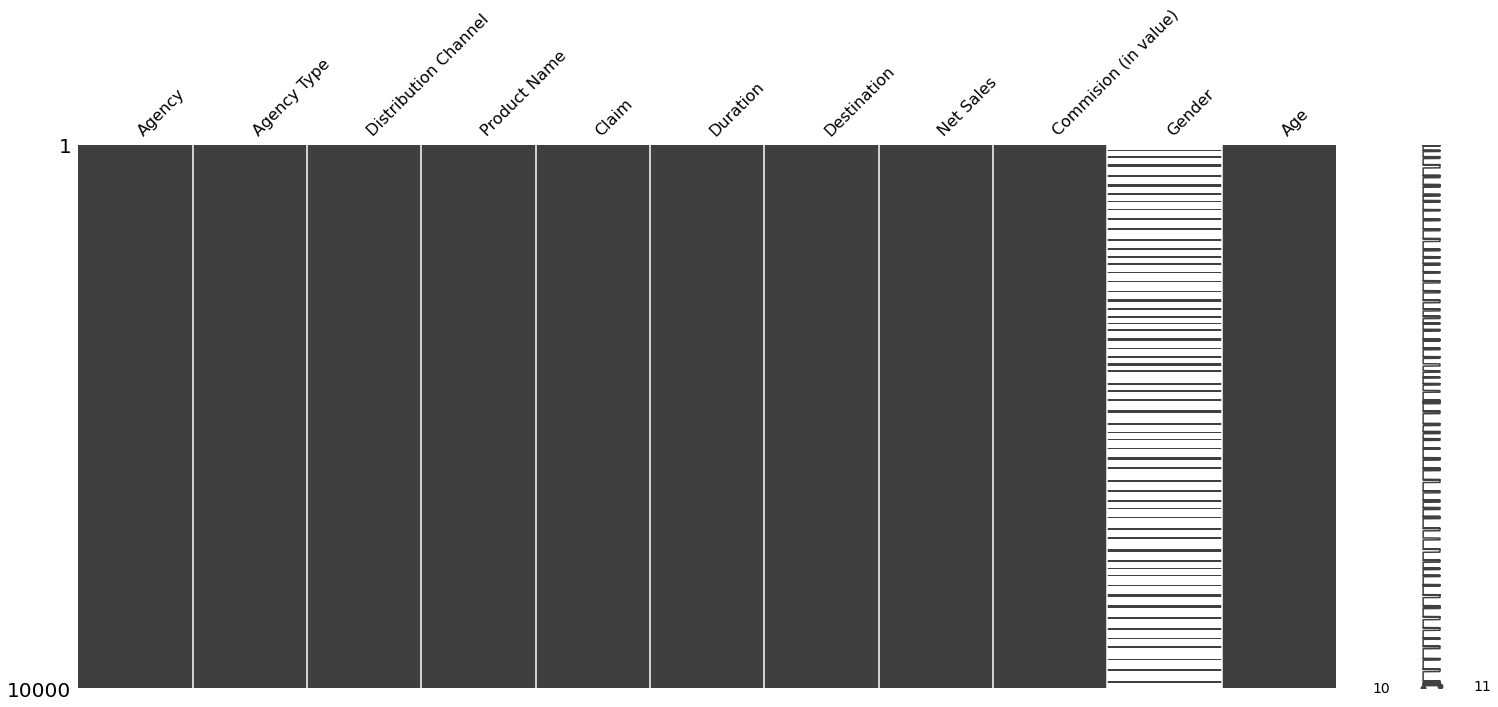

In [9]:
import missingno
missingno.matrix(dataset)

<AxesSubplot:xlabel='Net Sales', ylabel='Duration'>

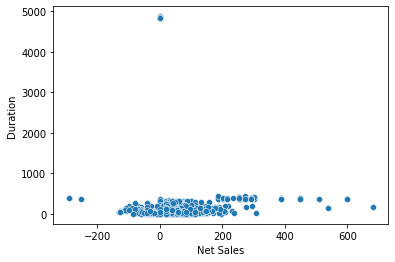

In [10]:
import seaborn as sns
sns.scatterplot(x='Net Sales', y='Duration', data=dataset)
# sns.countplot(x='Agency', data=data_raw)
# sns.countplot(x='Product Name', data=data_raw)

In [11]:
selected_dataset = dataset[['Net Sales',  'Duration']]
selected_dataset = pd.DataFrame(selected_dataset, columns=['Net Sales',  'Duration'])
selected_dataset

,Net Sales,Duration
0,-29.0,186
1,-29.0,186
2,-49.5,65
3,-39.6,60
4,-19.8,79
...,...,...
9995,54.0,97
9996,20.0,60
9997,40.0,89
9998,58.0,38


In [12]:
Q1 = np.percentile(selected_dataset['Duration'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(selected_dataset['Duration'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
print(IQR, Q3, Q1)

44.0 54.0 10.0


In [13]:
upper = np.where(selected_dataset['Duration'] >= (Q3+1.5*IQR))
lower = np.where(selected_dataset['Duration'] <= (Q1-1.5*IQR))

In [14]:
cleaned_dataset = selected_dataset.copy(deep=True)
cleaned_dataset.drop(upper[0], inplace = True)
cleaned_dataset.drop(lower[0], inplace = True)

<AxesSubplot:xlabel='Net Sales', ylabel='Duration'>

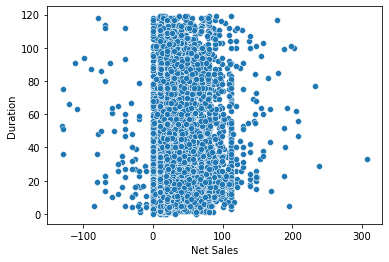

In [15]:
sns.scatterplot(x='Net Sales', y='Duration', data=cleaned_dataset)

In [16]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(cleaned_dataset)
# print(len(feature_mtx))
feature_mtx

array([[0.18425269, 0.54621849],
       [0.20691234, 0.50420168],
       [0.25223163, 0.66386555],
       ...,
       [0.38910506, 0.74789916],
       [0.43030442, 0.31932773],
       [0.34332799, 0.98319328]])

In [17]:
from scipy.spatial import distance_matrix 
dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.04773753 0.13587482 ... 0.28747102 0.33469519 0.46502894]
 [0.04773753 0.         0.16597105 ... 0.30427397 0.28996965 0.49803833]
 [0.13587482 0.16597105 0.         ... 0.16061128 0.3878353  0.33206738]
 ...
 [0.28747102 0.30427397 0.16061128 ... 0.         0.43054716 0.23970578]
 [0.33469519 0.28996965 0.3878353  ... 0.43054716 0.         0.66953892]
 [0.46502894 0.49803833 0.33206738 ... 0.23970578 0.66953892 0.        ]]


In [18]:
from sklearn.cluster import AgglomerativeClustering
agglom = AgglomerativeClustering(n_clusters = 8, linkage = 'average')
agglom.fit(feature_mtx)
agglom.labels_

array([4, 4, 0, ..., 0, 3, 0], dtype=int64)

In [19]:
cleaned_dataset['cluster'] = agglom.labels_
cleaned_dataset.head()

,Net Sales,Duration,cluster
2,-49.5,65,4
3,-39.6,60,4
4,-19.8,79,0
5,-121.0,66,4
6,-39.6,47,4


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Text(0, 0.5, 'Duration')

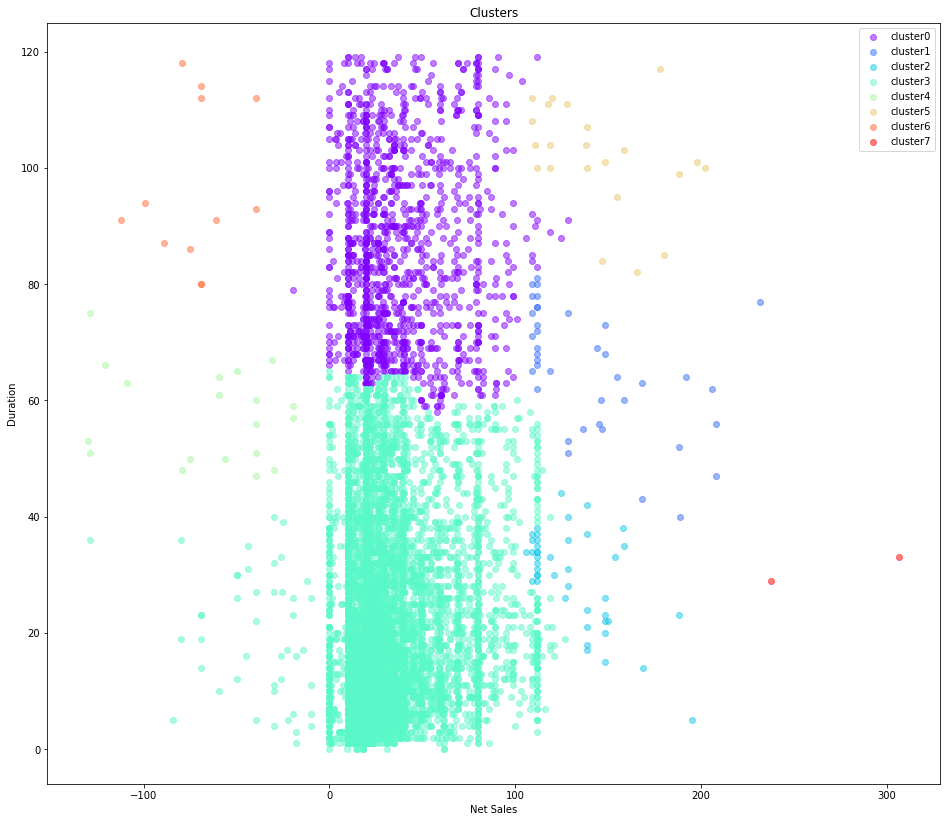

In [20]:
import matplotlib.cm as cm
import numpy as np 
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = cleaned_dataset[cleaned_dataset.cluster == label]
    plt.scatter(subset['Net Sales'], subset['Duration'], c=color, label='cluster'+str(label),alpha=0.5)
plt.legend()
plt.title('Clusters')
plt.xlabel('Net Sales')
plt.ylabel('Duration')

In [21]:
cleaned_dataset.groupby("cluster").mean()

,Net Sales,Duration
cluster,,
0,37.854945,85.991284
1,140.570513,65.256410
2,131.144186,29.581395
3,29.914131,20.373180
4,-66.026316,57.421053
5,144.570455,101.818182
6,-72.608333,96.500000
7,272.250000,31.000000


C:\Users\user\AppData\Local\Temp/ipykernel_21844/1476920044.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'average')


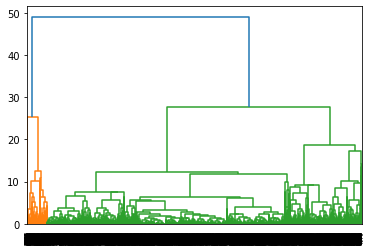

In [22]:
Z = hierarchy.linkage(dist_matrix, 'average')
dendro = hierarchy.dendrogram(Z)
